In [1]:
import math

def strassen(a, b, n0):
    """
    Multiply two matrices a and b together using Strassen's algorithm
    """
    # Get dimensions of input matrices
    a_rows, a_cols = len(a), len(a[0])
    b_rows, b_cols = len(b), len(b[0])
    
    # Check that the matrices are compatible for multiplication
    if a_cols != b_rows:
        raise ValueError("Matrices are not compatible for multiplication")
    
    # Pad matrices with zeros to make their dimensions powers of two
    max_dim = max(a_rows, a_cols, b_cols)
    padded_dim = 2 ** math.ceil(math.log2(max_dim))
    a_padded = [[0 for _ in range(padded_dim)] for _ in range(padded_dim)]
    b_padded = [[0 for _ in range(padded_dim)] for _ in range(padded_dim)]
    for i in range(a_rows):
        for j in range(a_cols):
            a_padded[i][j] = a[i][j]
    for i in range(b_rows):
        for j in range(b_cols):
            b_padded[i][j] = b[i][j]

    # Perform Strassen's algorithm
    result_padded = _strassen_helper(a_padded, b_padded, n0)

    # Remove padding from result matrix
    result = [[0 for _ in range(b_cols)] for _ in range(a_rows)]
    for i in range(a_rows):
        for j in range(b_cols):
            result[i][j] = result_padded[i][j]
    
    return result

def _strassen_helper(a, b, n0):
    """
    Helper function to perform Strassen's algorithm on padded matrices
    """
    # Get dimensions of input matrices
    dim = len(a)
    
    # Base case: if dimensions are 1x1, return their product
    if dim <= n0:
        return simple_mulMat(a, b)
    
    # Split matrices into quadrants
    half_dim = dim // 2
    a11 = [a[i][:half_dim] for i in range(half_dim)]
    a12 = [a[i][half_dim:] for i in range(half_dim)]
    a21 = [a[i][:half_dim] for i in range(half_dim, dim)]
    a22 = [a[i][half_dim:] for i in range(half_dim, dim)]
    b11 = [b[i][:half_dim] for i in range(half_dim)]
    b12 = [b[i][half_dim:] for i in range(half_dim)]
    b21 = [b[i][:half_dim] for i in range(half_dim, dim)]
    b22 = [b[i][half_dim:] for i in range(half_dim, dim)]
    
    # Compute products of submatrices
    p1 = _strassen_helper(a11, _sub_matrices(b12, b22),n0)
    p2 = _strassen_helper(_add_matrices(a11, a12), b22,n0)
    p3 = _strassen_helper(_add_matrices(a21, a22), b11,n0)
    p4 = _strassen_helper(a22, _sub_matrices(b21, b11), n0)
    p5 = _strassen_helper(_add_matrices(a11, a22), _add_matrices(b11, b22),n0)
    p6 = _strassen_helper(_sub_matrices(a12, a22), _add_matrices(b21, b22),n0)
    p7 = _strassen_helper(_sub_matrices(a21, a11), _add_matrices(b11, b12),n0)

    r11 = _add_matrices(_add_matrices(_sub_matrices(p4, p2),p5),p6)
    r12 = _add_matrices(p1,p2)
    r21 = _add_matrices(p3,p4)
    r22 = _add_matrices(_add_matrices(_sub_matrices(p1, p3),p5),p7)
    
    # Grouping the results obtained in a single matrix:
    R = [[0 for j in range(0, dim)] for i in range(0, dim)]
    for i in range(0, half_dim):
        for j in range(0, half_dim):
            R[i][j] = r11[i][j]
            R[i][j + half_dim] = r12[i][j]
            R[i + half_dim][j] = r21[i][j]
            R[i + half_dim][j + half_dim] = r22[i][j]
    return R
    
def _sub_matrices(a,b):
    n = len(a)
    rslt = [[0 for _ in range(n)] for _ in range(n)]
    
    for i in range(n):
        for j in range(n):
            rslt[i][j] = a[i][j]-b[i][j]
    return rslt

def _add_matrices(a,b):
    n = len(a)
    rslt = [[0 for _ in range(n)] for _ in range(n)]
    
    for i in range(n):
        for j in range(n):
            rslt[i][j] = a[i][j]+b[i][j]
    return rslt

def simple_mulMat(mat1, mat2):
    # List to store matrix multiplication result
    n = len(mat1)
    rslt = [[0 for _ in range(n)] for _ in range(n)]
  
    for i in range(n):
        for j in range(n):
            for k in range(n):
                rslt[i][j] += mat1[i][k] * mat2[k][j]
    return rslt

In [8]:
import time
import numpy as np
mat1 = np.random.randint(2, size=(500, 500)).astype(float)
mat2 = np.random.randint(2, size=(500, 500)).astype(float)
mat1_1 = np.random.randint(2, size=(500, 500))
mat2_1 = np.random.randint(2, size=(500, 500))
res = []

start = time.time()
strassen(mat1, mat2, 32)
end = time.time()
running_ms = (end - start)*1000
res.append(running_ms)

start = time.time()
strassen(mat1_1, mat2_1, 32)
end = time.time()
running_ms = (end - start)*1000
res.append(running_ms)

print(res)

[12962.92495727539, 12298.866271972656]


In [16]:
mat1 = np.random.randint(2, size=(500, 500))
mat2 = np.random.randint(2, size=(500, 500))
res = []

start = time.time()
strassen(mat1, mat2, 1)
end = time.time()
running_ms = (end - start)*1000
res.append(running_ms)

start = time.time()
simple_mulMat(mat1, mat2)
end = time.time()
running_ms = (end - start)*1000
res.append(running_ms)

print(res)

[176051.96809768677, 36695.054054260254]


In [22]:
mat1 = np.random.randint(2, size=(1024, 1024))
mat2 = np.random.randint(2, size=(1024, 1024))
res = []

start = time.time()
strassen(mat1, mat2, 1)
end = time.time()
running_ms = (end - start)*1000
res.append(running_ms)

start = time.time()
simple_mulMat(mat1, mat2)
end = time.time()
running_ms = (end - start)*1000
res.append(running_ms)

print(res)

[1264922.5769042969, 328847.17416763306]


In [77]:
import time
import numpy as np
mat1 = np.random.randint(2, size=(102, 102))
mat2 = np.random.randint(2, size=(102, 102))
res = []
for i in range(10):
    n0 = 2**i
    start = time.time()
    strassen(mat1, mat2, n0)
    end = time.time()
    running_ms = (end - start)*1000
    res.append(running_ms)
print(res)

[1228219.0070152283, 376541.08595848083, 172965.45672416687, 113378.01885604858, 93242.39993095398, 88258.8632106781, 91350.5539894104, 98850.94499588013, 111420.93110084534, 128446.14100456238, 152116.8658733368]


In [125]:
import time
size_list = [700, 1000, 2000]
component = [2, 3]
running_time = []
for s in size_list:
    for c in component:
        mat1 = np.random.randint(c, size=(s, s))
        mat2 = np.random.randint(c, size=(s, s))
        res = []
        for i in range(9):
            n0 = 2**i
            start = time.time()
            strassen(mat1, mat2, n0)
            end = time.time()
            running_ms = (end - start)*1000
            res.append(running_ms)
        running_time.append(res)

In [129]:
import pandas as pd
running_df = pd.DataFrame(running_time)
df = running_df.transpose()
df.to_csv('runningTime_report.csv')

In [ ]:
df.columns = ['700,2','700,3','1000,2','1000,3','2000,2','2000,3']

In [126]:
running_time

[[1221177.3869991302,
  374471.2219238281,
  169804.5802116394,
  110046.46110534668,
  91858.22105407715,
  87967.08416938782,
  144128.1979084015,
  2105401.8697738647,
  2097904.3810367584],
 [1211035.7642173767,
  372862.4918460846,
  189657.8118801117,
  126233.51883888245,
  103723.4058380127,
  97652.65393257141,
  101764.36996459961,
  112972.4771976471,
  128947.95489311218],
 [1322441.328048706,
  421365.1683330536,
  192873.7678527832,
  125125.92697143555,
  103393.51105690002,
  97995.58115005493,
  103072.83902168274,
  111575.22201538086,
  126923.79593849182],
 [1335697.5028514862,
  416883.8801383972,
  193579.87999916077,
  124915.92288017273,
  103934.69619750977,
  98334.8138332367,
  102899.0957736969,
  111669.98887062073,
  126085.76011657715],
 [9079781.935214996,
  2922191.5929317474,
  1357912.5080108643,
  881233.6251735687,
  731494.6002960205,
  684964.1218185425,
  723881.8798065186,
  780538.4368896484,
  881868.1647777557],
 [9002106.608867645,
  3602215

In [143]:
n = 2**5
n

32

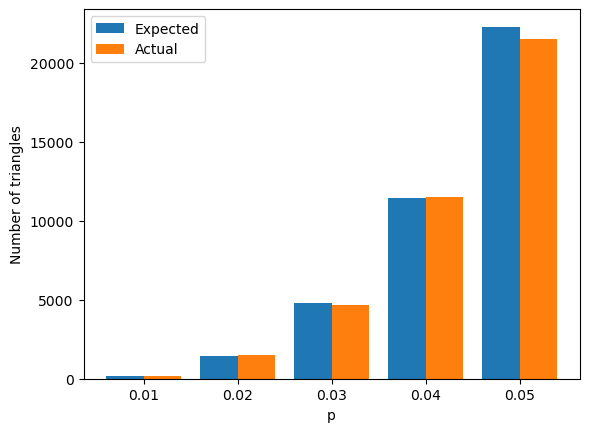

In [19]:
import numpy as np
import math

# set the number of vertices
n = 1024
n0 = 32

# create a list of probabilities to try
ps = [0.01, 0.02, 0.03, 0.04, 0.05]

# initialize lists to store the results
expected_triangles_list = []
actual_triangles_list = []

# loop over probabilities
for p in ps:
    # create a random adjacency matrix
    A_lower = np.tril((np.random.rand(n,n) <= p).astype(int), -1)
    A = A_lower + A_lower.transpose()

    # calculate the expected number of triangles
    expected_triangles = math.comb(n,3) * (p ** 3)
    
    # calculate the actual number of triangles using matrix multiplication
    A2 = strassen(A, A, n0)
    A3 = strassen(A2, A, n0)
    actual_triangles = int(np.trace(A3) / 6)
    
    # add the results to the lists
    expected_triangles_list.append(expected_triangles)
    actual_triangles_list.append(actual_triangles)

# create a bar chart comparing the expected and actual number of triangles
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(np.arange(len(ps)), expected_triangles_list, width=0.4, align='center', label='Expected')
ax.bar(np.arange(len(ps))+0.4, actual_triangles_list, width=0.4, align='center', label='Actual')
ax.set_xticks(np.arange(len(ps))+0.2)
ax.set_xticklabels(ps)
ax.set_xlabel('p')
ax.set_ylabel('Number of triangles')
ax.legend()
plt.show()


In [20]:
expected_triangles_list

[178.43302400000002,
 1427.4641920000001,
 4817.691647999999,
 11419.713536000001,
 22304.128000000004]

In [21]:
actual_triangles_list

[152, 1483, 4702, 11542, 21548]